<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/logisticregressionP4HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing the necessary variables
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [21]:
breast = load_breast_cancer() 

breast_data = breast.data 
breast_data.shape


(569, 30)

In [22]:
breast_input = pd.DataFrame(breast_data)
breast_input.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [24]:
labels = np.reshape(breast_labels,(569,1)) 

final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape 

(569, 31)

In [25]:
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names 
features 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels 
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
X = breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values #all variables in dataset
Y = breast_dataset.iloc[:, 30].values   #outcome values 

In [28]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
#create a scalar object
sc=StandardScaler()

#Fit the scaler to the training data and transform
X_train_std=sc.fit_transform(X_train)

#apply the scaler to the test data
X_test_std =sc.transform(X_test)

In [30]:
C=[10,1,.1,.001]
for c in C:
  clf=LogisticRegression(penalty='l1',C=c,solver='liblinear')
  clf.fit(X_train,y_train)
  print('C:',c)
  print('training accuracy:',clf.score(X_train_std,y_train))
  print('test accuracy:',clf.score(X_test_std,y_test))
  print('')


C: 10
training accuracy: 0.9142857142857143
test accuracy: 0.8947368421052632

C: 1
training accuracy: 0.4989010989010989
test accuracy: 0.5087719298245614

C: 0.1
training accuracy: 0.20659340659340658
test accuracy: 0.19298245614035087

C: 0.001
training accuracy: 0.13406593406593406
test accuracy: 0.12280701754385964



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [31]:
#10 fold selcted
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
model=LogisticRegression(solver='liblinear')
results= cross_val_score(model,X,Y,cv=kfold)
#output the accuracy calculate the mean and std across all folds
print("accuracy: %.3f%% (%.3f%%)" %(results.mean()*100.0,results.std()*100.0))

accuracy: 95.432% (3.858%)


In [32]:
#constrruct a confusion matrix
from sklearn.model_selection import train_test_split
test_size=0.33
seed=0
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print(matrix)

[[ 66   1]
 [  6 115]]


In [33]:
#constrruct a confusion matrix
from sklearn.model_selection import train_test_split
test_size=0.33
seed=0
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
report= classification_report(Y_test,predicted)
print(report)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        67
         1.0       0.99      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188



Text(0.5, 257.44, 'predicted label')

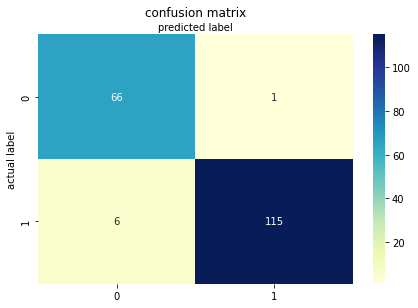

In [34]:
#visualize results of the model in form of confusion matrix
#will use heatmap for this
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] #number of classes
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')